# 1. Đọc, gộp và sắp xếp dữ liệu



In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

df_m = pd.read_csv('Data/movies.csv')

df_m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
df_u = pd.read_csv('Data/user.csv')

df_u.head()

,userId,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
df_r = pd.read_csv('Data/ratings.csv')

df_r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
df_t = pd.read_csv('Data/tags.csv')

df_t.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**Gộp làm một tập dữ liệu**

In [19]:
df = df_r \
    .merge(df_t, on=['userId', 'movieId']) \
    .merge(df_m, how='outer') \
    .merge(df_u, how='inner')

df.drop(['timestamp_x', 'timestamp_y', 'zip_code'], axis=1, inplace=True)

df.head()

,userId,movieId,rating,tag,title,genres,age,gender,occupation
0,336.0,1,4.0,pixar,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,M,salesman
1,474.0,1,4.0,pixar,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,51,M,executive
2,567.0,1,3.5,fun,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,M,entertainment
3,62.0,2,4.0,fantasy,Jumanji (1995),Adventure|Children|Fantasy,27,F,administrator
4,62.0,2,4.0,magic board game,Jumanji (1995),Adventure|Children|Fantasy,27,F,administrator


In [21]:
final_data = df[['userId', 'movieId', 'title', 'rating', 'genres', 'gender', 'age', 'occupation', 'tag']]

final_data.head()

,userId,movieId,title,rating,genres,gender,age,occupation,tag
0,336.0,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy,M,23,salesman,pixar
1,474.0,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy,M,51,executive,pixar
2,567.0,1,Toy Story (1995),3.5,Adventure|Animation|Children|Comedy|Fantasy,M,24,entertainment,fun
3,62.0,2,Jumanji (1995),4.0,Adventure|Children|Fantasy,F,27,administrator,fantasy
4,62.0,2,Jumanji (1995),4.0,Adventure|Children|Fantasy,F,27,administrator,magic board game


# 2. Phân tích dữ liệu

2.1. Số lượng dữ liệu

In [23]:
print('Số lượng người tham gia đánh giá: {}'.format(len(final_data['userId'].unique())))
print('Số lượng bộ phim được đánh giá: {}'.format(len(final_data['movieId'].unique())))
print('Số lượng điểm số có thể được cung cấp: {}'.format(len(final_data['rating'].unique())))

Số lượng người tham gia đánh giá: 54
Số lượng bộ phim được đánh giá: 1464
Số lượng điểm số có thể được cung cấp: 10


2.2. Phân bố điểm số trên đầu người

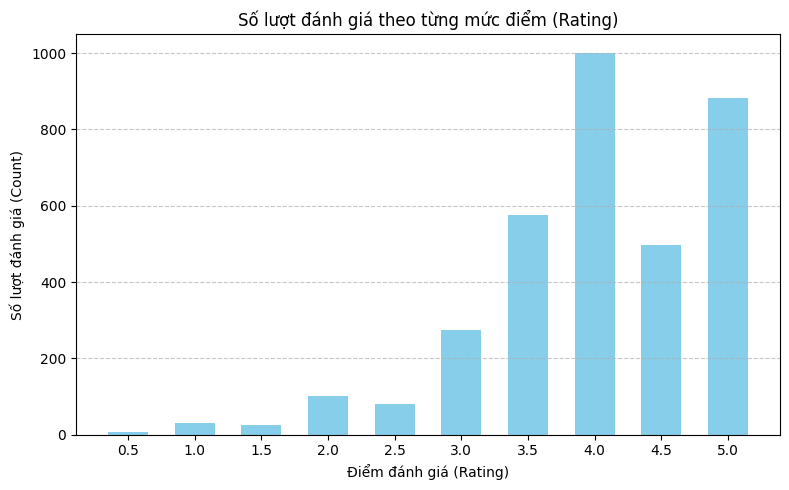

In [15]:
# Đếm số lượt đánh giá cho từng mức rating
rating_counts = final_data['rating'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, width=0.3, color='skyblue')
plt.xticks(rating_counts.index)
plt.title("Số lượt đánh giá theo từng mức điểm (Rating)")
plt.xlabel("Điểm đánh giá (Rating)")
plt.ylabel("Số lượt đánh giá (Count)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Điểm số chủ yếu phân bố xung quanh số điểm 4.

-> Các bộ phim trong tập dữ liệu thuộc xếp hạng hay.

2.3. Phân bố người xem dựa trên thể loại phim

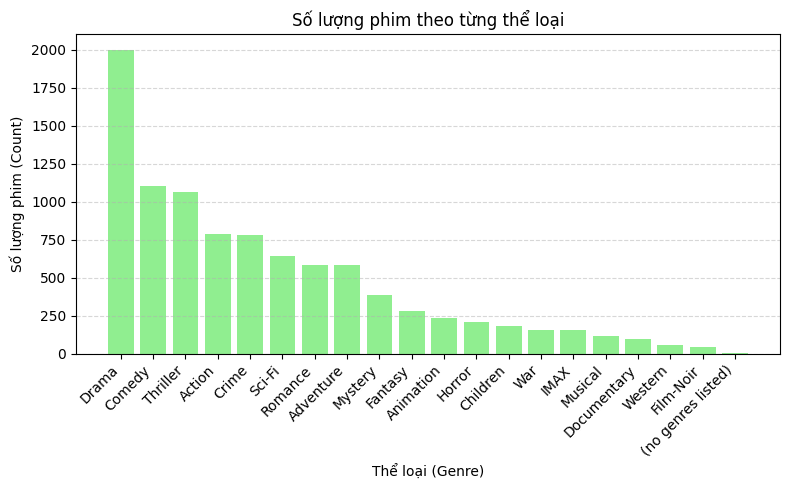

In [17]:
# Tách cột 'genres' thành nhiều dòng theo dấu '|'
genre_series = final_data['genres'].str.split('|').explode()

# Đếm số lượng phim theo từng thể loại
genre_counts = genre_series.value_counts().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.bar(genre_counts.index, genre_counts.values, color='lightgreen')
plt.title("Số lượng phim theo từng thể loại")
plt.xlabel("Thể loại (Genre)")
plt.ylabel("Số lượng phim (Count)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

-> Từ đây ta xác định được các thể loại phim được đa số người xem ưa chuộng

2.4. Mối liên hệ giữa giới tính và thể loại phim

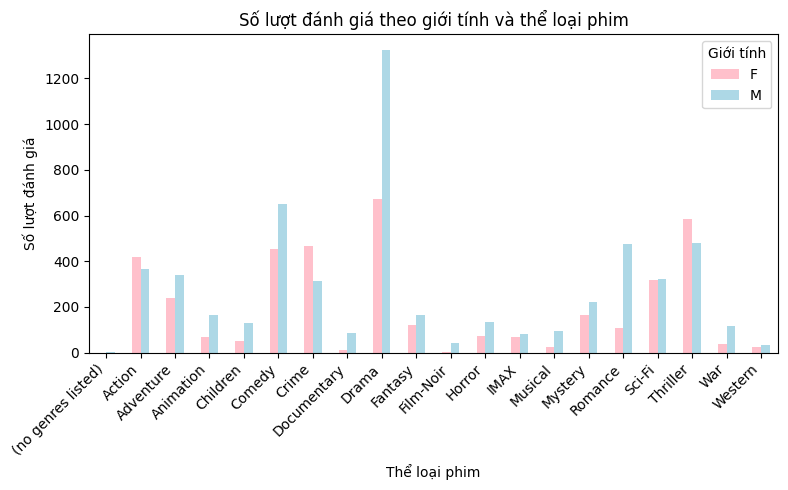

In [19]:
# Tách các thể loại phim
final_data_cop = final_data.copy()
final_data_cop['genre'] = final_data_cop['genres'].str.split('|')
final_data_cop = final_data_cop.explode('genre')

# Đếm số lượt đánh giá theo giới tính và thể loại
genre_gender_counts = final_data_cop.groupby(['genre', 'gender']).size().unstack(fill_value=0)

# Vẽ biểu đồ
genre_gender_counts.plot(kind='bar', figsize=(8, 5), color=['pink', 'lightblue'])
plt.title("Số lượt đánh giá theo giới tính và thể loại phim")
plt.xlabel("Thể loại phim")
plt.ylabel("Số lượt đánh giá")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()

-> Từ đây xác định được xu hướng thể loại phim ưa thích của từng giới.

2.5 Thống kê số lượt đánh giá trên đầu người

In [25]:
# Tổng số lượt đánh giá
total_ratings = final_data.shape[0]

# Số lượng người dùng duy nhất
num_users = final_data['userId'].nunique()

# Tính số lượt đánh giá trung bình mỗi người dùng
avg_ratings_per_user = total_ratings / num_users

print(f"Số lượt đánh giá trung bình mỗi người dùng: {avg_ratings_per_user:.2f}")

ratings_per_user = final_data.groupby('userId').size()
print(ratings_per_user.describe())  # Thống kê trung bình, min, max, v.v.


Số lượt đánh giá trung bình mỗi người dùng: 64.37
count      54.000000
mean       64.370370
std       210.163575
min         1.000000
25%         3.000000
50%         3.500000
75%        12.000000
max      1414.000000
dtype: float64


-> Phân bố mất cân bằng khi lượng người đánh giá dưới 12 bộ phim chiếm đa số. Người đánh giá nhiều nhất lên đến 1414 bộ phim trong khi người đánh giá ít nhất chỉ 1 bộ phim.

2.6 Thống kê số lượt đánh giá của từng bộ phim

In [30]:
# Tính số lượt đánh giá cho từng bộ phim, kèm tên nếu có
ratings_per_movie = (
    final_data.groupby('movieId')
    .size()
    .reset_index(name='num_ratings')
    .merge(final_data[['movieId', 'title']].drop_duplicates(), on='movieId') 
    if 'title' in final_data.columns
    else final_data.groupby('movieId').size().reset_index(name='num_ratings')
)

# Sắp xếp phim theo số lượt đánh giá giảm dần
ratings_per_movie_sorted = ratings_per_movie.sort_values(by='num_ratings', ascending=False)

# Hiển thị top 10 phim có nhiều lượt đánh giá nhất
print("Top 10 phim có nhiều lượt đánh giá nhất:")
print(ratings_per_movie_sorted.head(10))

# Tính và hiển thị phần trăm số phim theo ngưỡng đánh giá
total_movies = ratings_per_movie.shape[0]
thresholds = [5, 10, 20, 50, 100, 200, 500]

print("\nPhân bố số phim theo số lượt đánh giá:")
for t in thresholds:
    count = (ratings_per_movie['num_ratings'] < t).sum()
    percent = count / total_movies * 100
    print(f"- Dưới {t} đánh giá: {count} phim ({percent:.2f}%)")

# Thống kê số phim có từ 100 đánh giá trở lên
count_100_plus = (ratings_per_movie['num_ratings'] >= 100).sum()
percent_100_plus = count_100_plus / total_movies * 100
print(f"- Từ 100 đánh giá trở lên: {count_100_plus} phim ({percent_100_plus:.2f}%)")


Top 10 phim có nhiều lượt đánh giá nhất:
      movieId  num_ratings                                              title
72        296          181                                Pulp Fiction (1994)
604      2959           54                                  Fight Club (1999)
194       924           41                       2001: A Space Odyssey (1968)
71        293           35  Léon: The Professional (a.k.a. The Professiona...
414      1732           32                           Big Lebowski, The (1998)
1075     7361           30       Eternal Sunshine of the Spotless Mind (2004)
810      4878           28                                Donnie Darko (2001)
1339    79132           26                                   Inception (2010)
1426   135536           19                               Suicide Squad (2016)
739      4144           18      In the Mood For Love (Fa yeung nin wa) (2000)

Phân bố số phim theo số lượt đánh giá:
- Dưới 5 đánh giá: 1295 phim (88.46%)
- Dưới 10 đánh giá: 143

# 3. Mô hình Random Forest

3.1 Chia tập dữ liệu huấn luyện / kiểm tra

In [21]:
from sklearn.model_selection import train_test_split

# Tách 85% train, 15% test
train_data, test_data = train_test_split(final_data, test_size=0.15, random_state=42)

# Kiểm tra kích thước
print("Train size:", len(train_data))
print("Test size:", len(test_data))
train_data.head()


Train size: 2954
Test size: 522


,userId,movieId,title,rating,genres,gender,age,occupation,tag
2375,474.0,8714,Night and Day (1946),2.5,Drama|Musical,M,51,executive,Cole Porter
449,474.0,508,Philadelphia (1993),3.0,Drama,M,51,executive,AIDs
1961,474.0,6002,Love Liza (2002),3.5,Drama,M,51,executive,planes
1609,474.0,3897,Almost Famous (2000),4.5,Drama,M,51,executive,journalism
3436,62.0,174053,Black Mirror: White Christmas (2014),5.0,Drama|Horror|Mystery|Sci-Fi|Thriller,F,27,administrator,future


3.2 Encode các text contents

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ==== 1. Encode gender ====
le_gender = LabelEncoder()
train_data['gender_enc'] = le_gender.fit_transform(train_data['gender'])

# ==== 2. Encode occupation ====
le_occupation = LabelEncoder()
train_data['occupation_enc'] = le_occupation.fit_transform(train_data['occupation'])

# ==== 3. Encode genres ====
# Tách chuỗi genres thành danh sách các thể loại
train_data['genres_list'] = train_data['genres'].str.split('|')

# Dùng MultiLabelBinarizer để one-hot encode
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(train_data['genres_list'])

# Tạo DataFrame chứa các cột one-hot genres
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=train_data.index)

# ==== 4. Encode tag bằng TF-IDF ====
# Nếu có giá trị thiếu trong cột tag thì thay bằng chuỗi rỗng
train_data['tag_filled'] = train_data['tag'].fillna('')

# Dùng TF-IDF Vectorizer để mã hóa
tfidf = TfidfVectorizer(max_features=100)  # Bạn có thể thay đổi số lượng từ tối đa
tag_encoded = tfidf.fit_transform(train_data['tag_filled']).toarray()

# Tạo DataFrame chứa các cột TF-IDF của tag
tag_df = pd.DataFrame(tag_encoded, columns=tfidf.get_feature_names_out(), index=train_data.index)

# ==== 5. Tổng hợp các đặc trưng đã mã hóa ====
X_train_encoded = pd.concat([
    train_data[['gender_enc', 'occupation_enc']],
    genres_df,
    tag_df
], axis=1)

# ==== 6. Label (điểm số rating) ====
y_train = train_data['rating']

X_train_encoded.head()

,gender_enc,occupation_enc,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,thought,time,top,travel,twist,violence,visually,war,will,world
2375,1,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,1,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,1,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609,1,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3436,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Tương tự, mã hóa cho tập test_data.

In [25]:
print("Giá trị trong train:", set(le_gender.classes_))
print("Giá trị trong test :", set(test_data['gender'].unique()))

print("Giá trị trong train:", set(le_occupation.classes_))
print("Giá trị trong test :", set(test_data['occupation'].unique()))


Giá trị trong train: {'M', 'F'}
Giá trị trong test : {'M', 'F'}
Giá trị trong train: {'programmer', 'engineer', 'administrator', 'lawyer', 'entertainment', 'marketing', 'retired', 'doctor', 'healthcare', 'executive', 'none', 'salesman', 'educator', 'homemaker', 'librarian', 'student', 'other'}
Giá trị trong test : {'programmer', 'engineer', 'administrator', 'lawyer', 'entertainment', 'marketing', 'retired', 'writer', 'executive', 'salesman', 'librarian', 'educator', 'student', 'other'}


- Kiểm tra xem giữa hai tập train và test có giá trị khác nhau nào không.

In [27]:
test_data = test_data[test_data['occupation'].isin(le_occupation.classes_)]


- Loại bỏ các giá trị không xuất hiện trong tập train

In [29]:
# Áp dụng lại LabelEncoder cho 'gender' và 'occupation'
test_data['gender_enc'] = le_gender.transform(test_data['gender'])
test_data['occupation_enc'] = le_occupation.transform(test_data['occupation'])

# Áp dụng lại MultiLabelBinarizer cho 'genres'
test_data['genres_list'] = test_data['genres'].str.split('|')
genres_encoded_test = mlb.transform(test_data['genres_list'])
genres_df_test = pd.DataFrame(genres_encoded_test, columns=mlb.classes_, index=test_data.index)

# Áp dụng lại TfidfVectorizer cho 'tag'
tags_encoded_test = tfidf.transform(test_data['tag'].fillna(''))
tags_df_test = pd.DataFrame(tags_encoded_test.toarray(), columns=tfidf.get_feature_names_out(), index=test_data.index)

# Gộp tất cả đặc trưng lại (loại bỏ cột không cần thiết)
X_test_encoded = pd.concat([
    test_data[['gender_enc', 'occupation_enc']].reset_index(drop=True),
    genres_df_test.reset_index(drop=True),
    tags_df_test.reset_index(drop=True)
], axis=1)

# Gán y_test là cột rating
y_test = test_data['rating']

X_test_encoded.head()


,gender_enc,occupation_enc,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,thought,time,top,travel,twist,violence,visually,war,will,world
0,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,16,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3.3 Xây dựng mô hình RF

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Khởi tạo mô hình
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Đánh giá bằng Negative MSE (do cross_val_score yêu cầu hàm phải dạng "score" → càng lớn càng tốt)
mse_scores = cross_val_score(rf_model, X_train_encoded, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(rf_model, X_train_encoded, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Đổi dấu về dương để dễ hiểu
mse_scores = -mse_scores
mae_scores = -mae_scores

# 4. In kết quả trung bình và từng fold
print("MSE mỗi fold:", mse_scores)
print("MAE mỗi fold:", mae_scores)
print("MSE trung bình:", np.mean(mse_scores))
print("MAE trung bình:", np.mean(mae_scores))

# 5. Huấn luyện lại mô hình trên toàn bộ tập huấn luyện
rf_model.fit(X_train_encoded, y_train)


MSE mỗi fold: [0.35307444 0.49434427 0.47582739 0.41830979 0.44136141]
MAE mỗi fold: [0.37163953 0.41902441 0.41582277 0.40294693 0.42290025]
MSE trung bình: 0.4365834601726558
MAE trung bình: 0.40646677540403264


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Xử lý mất cân bằng dữ liệu cho rating để xem liệu có phải mô hình bị overfitting không.

In [33]:
from sklearn.utils import resample

# Gộp X_train_encoded và y_train thành một DataFrame
df_train = X_train_encoded.copy()
df_train['rating'] = y_train

# Tách theo điểm số
df_1 = df_train[df_train['rating'] == 1.0]
df_1_5 = df_train[df_train['rating'] == 1.5]
df_2 = df_train[df_train['rating'] == 2.0]
df_2_5 = df_train[df_train['rating'] == 2.5]
df_3 = df_train[df_train['rating'] == 3.0]
df_3_5 = df_train[df_train['rating'] == 3.5]
df_4 = df_train[df_train['rating'] == 4.0]
df_4_5 = df_train[df_train['rating'] == 4.5]
df_5 = df_train[df_train['rating'] == 5.0]

# Undersample các nhóm đông
df_4_down = resample(df_4, replace=False, n_samples=600, random_state=42)
df_4_5_down = resample(df_4_5, replace=False, n_samples=400, random_state=42)
df_5_down = resample(df_5, replace=False, n_samples=600, random_state=42)

# Gộp lại thành tập balanced
df_balanced = pd.concat([
    df_1, df_1_5, df_2, df_2_5,
    df_3, df_3_5,
    df_4_down, df_4_5_down, df_5_down
])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Tách lại X và y
X_train_balanced = df_balanced.drop('rating', axis=1)
y_train_balanced = df_balanced['rating']


In [35]:
mse_scores1 = -cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=kf, scoring='neg_mean_squared_error')
mae_scores1 = -cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=kf, scoring='neg_mean_absolute_error')

print("MSE trung bình sau cân bằng:", mse_scores1.mean())
print("MAE trung bình sau cân bằng:", mae_scores1.mean())

# Huấn luyện lại trên toàn bộ balanced data
rf_model.fit(X_train_balanced, y_train_balanced)


MSE trung bình sau cân bằng: 0.42681093633628375
MAE trung bình sau cân bằng: 0.4155207821798205


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Điểm số của MSE và MAE không thay đổi đáng kể, mô hình hoạt động ổn định.

In [37]:
y_pred = rf_model.predict(X_test_encoded)

# Đánh giá trên tập hold-out
from sklearn.metrics import r2_score
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))


Test MSE: 0.3646241835757615
Test MAE: 0.3648870660627305
Test R2: 0.48875241866189234


- Chênh lệch điểm số dự đoán vào khoảng 0,4 điểm

 -> Mô hình dự đoán khá tốt.

# 4. Collaborative Filtering

4.1 Xây dựng 3 mô hình SVD, SlopeOne, KNNBasic

--- Đánh giá mô hình SVD ---
--- Đánh giá mô hình SlopeOne ---
--- Đánh giá mô hình KNNBasic ---
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
            RMSE     MAE
SVD       0.8732  0.6709
SlopeOne  0.9011  0.6882
KNNBasic  0.9085  0.6994


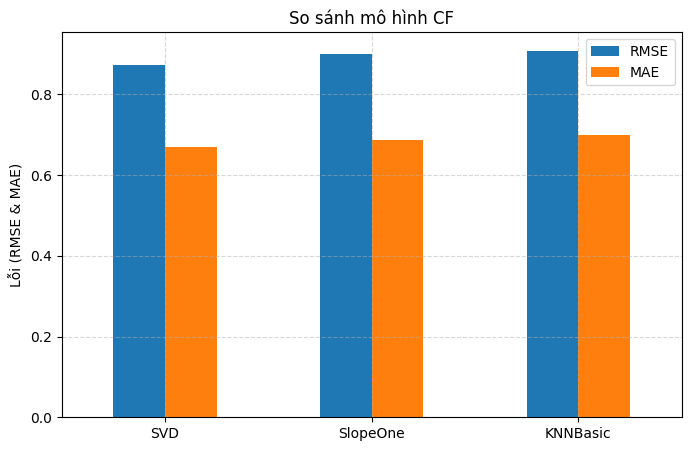

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, SlopeOne, KNNBasic
from surprise.model_selection import cross_validate, KFold

# Đọc dữ liệu
ratings = pd.read_csv("Data/ratings.csv")
ratings = ratings[['userId', 'movieId', 'rating']]

# Chuẩn bị dữ liệu cho Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings, reader)

# Thiết lập mô hình
models = {
    'SVD': SVD(random_state=42),
    'SlopeOne': SlopeOne(),
    'KNNBasic': KNNBasic(sim_options={'user_based': False})
}

# Khởi tạo 5-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Đánh giá từng mô hình
results = {}
for name, model in models.items():
    print(f"--- Đánh giá mô hình {name} ---")
    scores = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=kf, verbose=False)
    results[name] = {
        'RMSE': round(scores['test_rmse'].mean(), 4),
        'MAE': round(scores['test_mae'].mean(), 4)
    }

# So sánh mô hình
df_results = pd.DataFrame(results).T.sort_values(by='RMSE')
print(df_results)

# Vẽ biểu đồ
df_results.plot(kind='bar', figsize=(8, 5), title='So sánh mô hình CF')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel("Lỗi (RMSE & MAE)")
plt.show()


- Sau huấn luyện trên tập rating, ta thấy thông số khá đồng đều nhưng mô hình SVD cho số điểm tốt hơn so với hai mô hình còn lại.

4.2 Đánh giá độ chính xác của mô hình SVD

In [41]:
from surprise.model_selection import train_test_split
from surprise import accuracy

# Chia dữ liệu
trainset, testset = train_test_split(data, test_size=0.15, random_state=42)

# Huấn luyện SVD thuần
svd = SVD(random_state=42)
svd.fit(trainset)
def precision_recall_at_k(predictions, k=10, threshold=4.0):
    '''Tính precision, recall và f1-score cho từng người dùng'''

    from collections import defaultdict

    # Với mỗi user, tạo 2 danh sách: dự đoán top-k & ground truth >= threshold
    top_k_preds = defaultdict(list)
    rel_items = defaultdict(set)

    for uid, iid, true_r, est, _ in predictions:
        if true_r >= threshold:
            rel_items[uid].add(iid)
        top_k_preds[uid].append((iid, est))

    for uid in top_k_preds:
        top_k_preds[uid] = sorted(top_k_preds[uid], key=lambda x: x[1], reverse=True)[:k]

    precisions, recalls, f1s = [], [], []

    for uid in rel_items:
        true_set = rel_items[uid]
        pred_set = set(iid for iid, _ in top_k_preds[uid])

        n_hit = len(true_set & pred_set)
        n_rel = len(true_set)
        n_rec = len(pred_set)

        precision = n_hit / n_rec if n_rec > 0 else 0
        recall = n_hit / n_rel if n_rel > 0 else 0
        f1 = 2 * precision * recall / (precision + recall + 1e-8) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return round(sum(precisions) / len(precisions), 4), \
           round(sum(recalls) / len(recalls), 4), \
           round(sum(f1s) / len(f1s), 4)

# Dự đoán trên testset
predictions = svd.test(testset)

# Đánh giá RMSE & MAE nếu cần
print("RMSE:", round(accuracy.rmse(predictions, verbose=False), 4))
print("MAE: ", round(accuracy.mae(predictions, verbose=False), 4))
print("MSE: ", round(accuracy.mse(predictions, verbose=False), 4))

# Precision, Recall, F1
precision, recall, f1 = precision_recall_at_k(predictions, k=10, threshold=4.0)
print(f"🎯 Precision: {precision}")
print(f"🎯 Recall:    {recall}")
print(f"🎯 F1-score:  {f1}")


RMSE: 0.8842
MAE:  0.6775
MSE:  0.7818
🎯 Precision: 0.6438
🎯 Recall:    0.7347
🎯 F1-score:  0.6175


4.3 Thiết lập bảng xếp hạng 10 bộ phim hay nhất bằng SVD

In [43]:
from surprise.model_selection import train_test_split

# Đọc dữ liệu
ratings = pd.read_csv("Data/ratings.csv")
movies = pd.read_csv("Data/movies.csv")  # để tra tên phim

# Chuẩn bị dữ liệu cho Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train SVD
trainset = data.build_full_trainset()
svd = SVD(random_state=42)
svd.fit(trainset)

# Dự đoán điểm cho từng phim bằng cách lấy trung bình điểm dự đoán của các user
all_movie_ids = ratings['movieId'].unique()
all_user_ids = ratings['userId'].unique()

movie_pred_scores = []

# Lặp qua từng phim
for movie_id in all_movie_ids:
    preds = [svd.predict(user_id, movie_id).est for user_id in all_user_ids]
    avg_pred = sum(preds) / len(preds)
    movie_pred_scores.append((movie_id, avg_pred))

# Tạo DataFrame, nối tên phim
df_preds = pd.DataFrame(movie_pred_scores, columns=['movieId', 'pred_rating'])
df_preds = df_preds.merge(movies[['movieId', 'title']], on='movieId')
df_preds = df_preds.sort_values(by='pred_rating', ascending=False)

# Lấy Top 10 phim được dự đoán cao nhất
top_10_movies = df_preds.head(10)
print("🎬 Top 10 phim hay nhất theo dự đoán của mô hình SVD:")
print(top_10_movies[['title', 'pred_rating']])


🎬 Top 10 phim hay nhất theo dự đoán của mô hình SVD:
                                                  title  pred_rating
232                    Shawshank Redemption, The (1994)     4.393611
2395                          Lawrence of Arabia (1962)     4.370431
722   Dr. Strangelove or: How I Learned to Stop Worr...     4.320042
1027                              Godfather, The (1972)     4.265270
192                                   Fight Club (1999)     4.247140
1110                              Cool Hand Luke (1967)     4.245288
1184                        Boondock Saints, The (2000)     4.244586
74                                    Goodfellas (1990)     4.241411
332                                  Rear Window (1954)     4.240893
2158                Guess Who's Coming to Dinner (1967)     4.240148


- Đánh giá độ chính xác của bảng xếp hạng.

In [45]:
# --- Bảng xếp hạng top 10 phim từ mô hình SVD ---
top_10_movie_ids = [movie_id for movie_id, _ in sorted(movie_pred_scores, key=lambda x: x[1], reverse=True)[:10]]

# --- Tính Precision@10 và Recall@10 toàn hệ thống ---
from collections import defaultdict

def evaluate_global_top_k(top_k_ids, ratings_df, threshold=4.0):
    user_true_likes = defaultdict(set)
    user_hits = defaultdict(int)

    for row in ratings_df.itertuples():
        uid = row.userId
        mid = row.movieId
        rating = row.rating
        if rating >= threshold:
            user_true_likes[uid].add(mid)
            if mid in top_k_ids:
                user_hits[uid] += 1

    precisions = []
    recalls = []

    for uid in user_true_likes:
        n_rel = len(user_true_likes[uid])
        n_hit = user_hits[uid]
        precisions.append(n_hit / len(top_k_ids))
        recalls.append(n_hit / n_rel if n_rel > 0 else 0)

    avg_precision = round(sum(precisions) / len(precisions), 4)
    avg_recall = round(sum(recalls) / len(recalls), 4)

    return avg_precision, avg_recall

# Gọi hàm
precision_at_10, recall_at_10 = evaluate_global_top_k(top_10_movie_ids, ratings, threshold=4.0)

print(f"🎯 Precision: {precision_at_10}")
print(f"🎯 Recall:    {recall_at_10}")


🎯 Precision: 0.1621
🎯 Recall:    0.0284


- Điểm số đánh giá có thể coi là chấp nhận được đối với hệ thống đề xuất chung.

# 5. Xây dựng Hybrid system kết hợp RF và SVD

5.1 Hệ thống Hybrid thuần không trọng số

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Lấy danh sách userId và movieId để kiểm tra SVD có xử lý được không
known_users = set(trainset._raw2inner_id_users.keys())
known_movies = set(trainset._raw2inner_id_items.keys())

# Kết hợp dự đoán từ hai mô hình
hybrid_preds = []

for i in range(len(test_data)):
    uid = test_data.iloc[i]['userId']
    mid = test_data.iloc[i]['movieId']

    if uid in known_users and mid in known_movies:
        # Dự đoán bằng SVD nếu không phải cold-start
        pred = svd.predict(uid, mid).est
    else:
        # Cold-start: dùng Random Forest
        pred = rf_model.predict(X_test_encoded.iloc[[i]])[0]

    hybrid_preds.append(pred)


In [49]:
mse = mean_squared_error(y_test, hybrid_preds)
mae = mean_absolute_error(y_test, hybrid_preds)
rmse = np.sqrt(mse)

print("\n🎯 ĐÁNH GIÁ MÔ HÌNH KẾT HỢP SVD + Random Forest:")
print(f"  ✅ MSE:  {mse:.4f}")
print(f"  ✅ MAE:  {mae:.4f}")
print(f"  ✅ RMSE: {rmse:.4f}")



🎯 ĐÁNH GIÁ MÔ HÌNH KẾT HỢP SVD + Random Forest:
  ✅ MSE:  0.5058
  ✅ MAE:  0.5625
  ✅ RMSE: 0.7112


-> Hệ thống Hybrid cho ra điểm số nằm giữa mức điểm của RF và SVD, việc lấy trung bình này sẽ đảm bảo đầu ra dự đoán ổn định hơn đối với các tập dữ liệu thường lớn và phức tạp trên thực tế.

5.2 Sử dụng trọng số cho hệ thống

In [51]:
# Tính số lượng đánh giá của từng user
user_rating_counts = ratings.groupby('userId').size().to_dict()


- Dùng log-scale để tránh thiên lệch.

In [53]:
import numpy as np

max_log = np.log1p(max(user_rating_counts.values()))
user_alpha = {}

for uid, count in user_rating_counts.items():
    alpha = np.log1p(count) / max_log
    user_alpha[uid] = alpha


In [55]:
# Lấy danh sách userId và movieId để kiểm tra SVD có xử lý được không
known_users = set(trainset._raw2inner_id_users.keys())
known_movies = set(trainset._raw2inner_id_items.keys())

# Kết hợp dự đoán từ hai mô hình
hybrid_preds = []

for i in range(len(test_data)):
    uid = test_data.iloc[i]['userId']
    mid = test_data.iloc[i]['movieId']

    if uid in known_users and mid in known_movies:
        # Trường hợp user không phải cold-start
        svd_est = svd.predict(uid, mid).est
        rf_est = rf_model.predict(X_test_encoded.iloc[[i]])[0]

        # Lấy trọng số alpha dựa vào số rating của user
        alpha = user_alpha.get(uid, 0.5)  # fallback nếu không có uid
        pred = alpha * svd_est + (1 - alpha) * rf_est
    else:
        # Cold-start: chỉ dùng Random Forest
        pred = rf_model.predict(X_test_encoded.iloc[[i]])[0]

    hybrid_preds.append(pred)

In [57]:
mse = mean_squared_error(y_test, hybrid_preds)
mae = mean_absolute_error(y_test, hybrid_preds)
rmse = np.sqrt(mse)

print("\n🎯 ĐÁNH GIÁ MÔ HÌNH KẾT HỢP SVD + Random Forest:")
print(f"  ✅ MSE:  {mse:.4f}")
print(f"  ✅ MAE:  {mae:.4f}")
print(f"  ✅ RMSE: {rmse:.4f}")



🎯 ĐÁNH GIÁ MÔ HÌNH KẾT HỢP SVD + Random Forest:
  ✅ MSE:  0.4344
  ✅ MAE:  0.5138
  ✅ RMSE: 0.6591


- Khi kết hợp trọng số điều chỉnh giữa CF (SVD) và Random Forest dựa trên mức độ thông tin có sẵn của người dùng, mô hình cho ra điểm số dự đoán chính xác hơn.